In [1]:
# Import of necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
# Read data
df = pd.read_csv('data_retail 2.csv', sep = ";")

# Exploratory data analysis and feature engineering

In [3]:
# 1. Exploratory data analysis i feature engineering
# Print the number of nulls
print(df.isnull().sum())

# Number of rows in data set
total_rows = df.shape[0]
print(f'Total number of rows: {total_rows}')

# Descriptive statistics
df.describe()

ID                      0
BirthYr                 0
EduLvl                  0
MaritalS                0
AvgAnnHshldIncome      24
NumChildren             0
NumTeenagers            0
RegistrationDt          0
NumDays                 0
AmtAlcohol              0
AmtFruits               0
AmtMeatProds            0
AmtSeafoodProds         0
AmtSweetProducts        0
AmtOtherProds           0
NumPromoPurchases       0
NumOnlinePurchases      0
NumCatalogPurchases     0
NumStorePurchases       0
NumOnlineVisitsMth      0
Cmpgn1Hit               0
Cmpgn2Hit               0
Cmpgn3Hit               0
Cmpgn4Hit               0
Cmpgn5Hit               0
dtype: int64
Total number of rows: 2240


,ID,BirthYr,NumChildren,NumTeenagers,NumDays,AmtAlcohol,AmtFruits,AmtMeatProds,AmtSeafoodProds,AmtSweetProducts,...,NumPromoPurchases,NumOnlinePurchases,NumCatalogPurchases,NumStorePurchases,NumOnlineVisitsMth,Cmpgn1Hit,Cmpgn2Hit,Cmpgn3Hit,Cmpgn4Hit,Cmpgn5Hit
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1120.500000,1977.855804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.325000,4.084821,2.662054,5.790179,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768
std,646.776623,11.761597,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,1.932238,2.778714,2.923101,3.250958,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813
min,1.000000,1939.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,560.750000,1968.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1120.500000,1979.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1680.250000,1986.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2240.000000,2005.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Check the data type for variable which contains nulls
print(df['AvgAnnHshldIncome'].dtype)

object


In [5]:
df['AvgAnnHshldIncome'] = df['AvgAnnHshldIncome'].str.replace(',', '.').astype(float)
print(df['AvgAnnHshldIncome'].head())

0    75579.4
1    60247.2
2    93096.9
3    34639.8
4    75780.9
Name: AvgAnnHshldIncome, dtype: float64


In [6]:
# Fill missing data using mean imptutation (around 1% of total number of observations)
# We replaced missing values for numeric data with mean values
# Other methods are such: using median imputation, mode inputation (most frequent values, for categorical variables), KNN imputation, regression imputation
df['AvgAnnHshldIncome'] = df['AvgAnnHshldIncome'].fillna(df['AvgAnnHshldIncome'].mean())

# Verify the imputation
print(df['AvgAnnHshldIncome'].isnull().sum())

0


In [7]:
# During analysis we fpund that variable MaritalS contains not typical values such as Absurd, YOLO, so we decided to define those example as "Unknown" category
impute_category = "Unknown"  

# Impute missing or incorrect values in 'MaritalS' with the defined value
df['MaritalS'] = df['MaritalS'].replace(["Absurd", "YOLO"], impute_category)

# Verify the imputed values
print("Imputed Marital Status Values:")
print(df['MaritalS'].value_counts())

Imputed Marital Status Values:
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Unknown       4
Alone         3
Name: MaritalS, dtype: int64


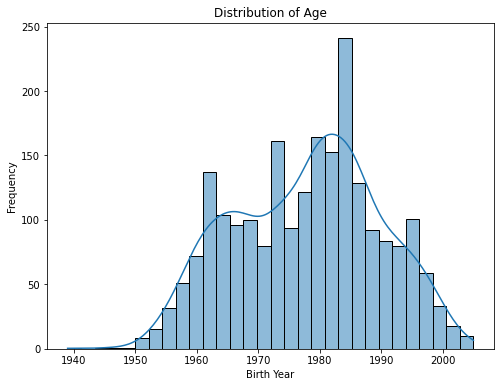

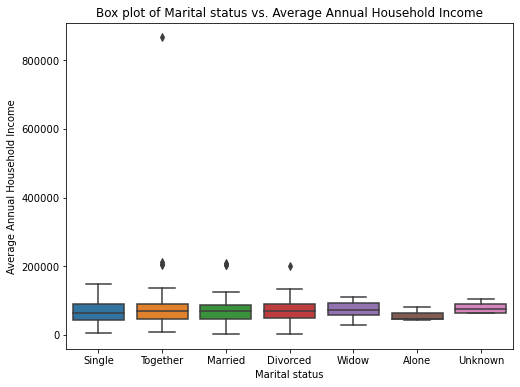

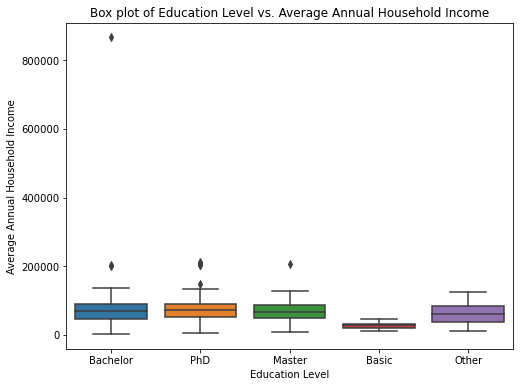

In [8]:
# Visualizations
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['BirthYr'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

# Box plot: Education Level vs. Average Annual Household Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='MaritalS', y='AvgAnnHshldIncome', data=df)
plt.title('Box plot of Marital status vs. Average Annual Household Income')
plt.xlabel('Marital status')
plt.ylabel('Average Annual Household Income')
plt.show()

# Box plot: Education Level vs. Average Annual Household Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='EduLvl', y='AvgAnnHshldIncome', data=df)
plt.title('Box plot of Education Level vs. Average Annual Household Income')
plt.xlabel('Education Level')
plt.ylabel('Average Annual Household Income')
plt.show()

In [9]:
# Feature Engineering

# 1. Calculate the age of the customer
current_year = datetime.now().year
df['Age'] = current_year - df['BirthYr']

# 2. Total number of children
df['TotalChildren'] = df['NumChildren'] + df['NumTeenagers']

# 3. Total purchases
df['TotalAmountSpent'] = df['AmtAlcohol'] + df['AmtFruits'] + df['AmtMeatProds'] + df['AmtSeafoodProds'] + df['AmtSweetProducts'] + df['AmtOtherProds']

# 4. Total amount spent on products
df['TotalPurchases'] = df['NumPromoPurchases'] + df['NumOnlinePurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Summary of the new features
print("\nSummary of new features:\n", df[['Age', 'TotalChildren', 'TotalAmountSpent', 'TotalPurchases']].head())


Summary of new features:
    Age  TotalChildren  TotalAmountSpent  TotalPurchases
0   58              0              1617              25
1   61              2                27               6
2   50              0               776              21
3   31              1                53               8
4   34              1               422              19


In [10]:
df.head()

,ID,BirthYr,EduLvl,MaritalS,AvgAnnHshldIncome,NumChildren,NumTeenagers,RegistrationDt,NumDays,AmtAlcohol,...,NumOnlineVisitsMth,Cmpgn1Hit,Cmpgn2Hit,Cmpgn3Hit,Cmpgn4Hit,Cmpgn5Hit,Age,TotalChildren,TotalAmountSpent,TotalPurchases
0,1,1966,Bachelor,Single,75579.4,0,0,04.09.2022,58,635,...,7,0,0,0,0,0,58,0,1617,25
1,2,1963,Bachelor,Single,60247.2,1,1,08.03.2024,38,11,...,5,0,0,0,0,0,61,2,27,6
2,3,1974,Bachelor,Together,93096.9,0,0,21.08.2023,26,426,...,4,0,0,0,0,0,50,0,776,21
3,4,1993,Bachelor,Together,34639.8,1,0,10.02.2024,26,11,...,6,0,0,0,0,0,31,1,53,8
4,5,1990,PhD,Married,75780.9,1,0,19.01.2024,94,173,...,5,0,0,0,0,0,34,1,422,19


In [11]:
# Feature Engineering for variable RegistrationDt to break it into categories
# Extract month and year from the 'RegistrationDt' variable
df['RegistrationDt'] = pd.to_datetime(df['RegistrationDt'], format='%d.%m.%Y')

df['Month'] = df['RegistrationDt'].dt.month
df['Year'] = df['RegistrationDt'].dt.year

# Define a function to map quarters to numerical values
def map_to_quarter_numeric(month):
    if month in [1, 2, 3]:
        return 1
    elif month in [4, 5, 6]:
        return 2
    elif month in [7, 8, 9]:
        return 3
    else:
        return 4

# Apply the function to create the 'DateOfRegistration' variable as a float
df['DateOfRegistration'] = df['Month'].apply(map_to_quarter_numeric) + (df['Year'] - df['Year'].min()) * 4
df.drop(columns=['Month', 'Year'], inplace=True)

# Display the first few rows to verify
print(df[['RegistrationDt', 'DateOfRegistration']].head())

min_date_registration = df['DateOfRegistration'].min()
max_date_registration = df['DateOfRegistration'].max()

print("Minimum Date Of Registration:", min_date_registration)
print("Maximum Date Of Registration:", max_date_registration)

  RegistrationDt  DateOfRegistration
0     2022-09-04                   3
1     2024-03-08                   9
2     2023-08-21                   7
3     2024-02-10                   9
4     2024-01-19                   9
Minimum Date Of Registration: 3
Maximum Date Of Registration: 10


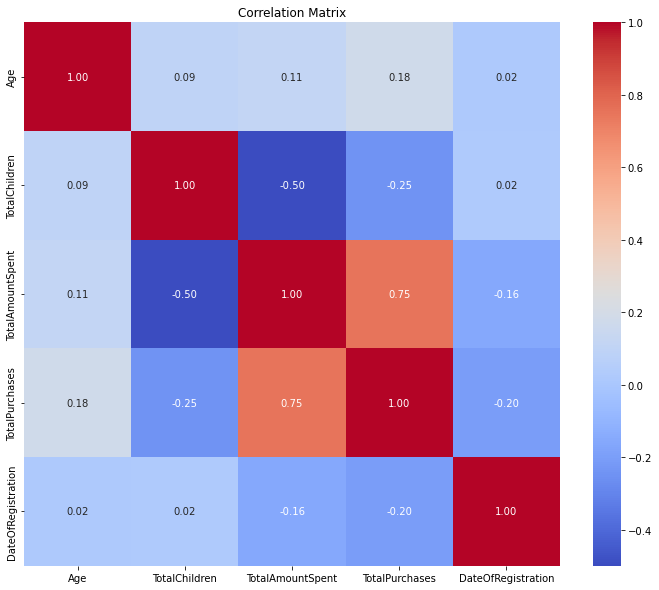

c:\Users\48795\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


              feature        VIF
0               const  30.465599
1                 Age   1.059521
2       TotalChildren   1.439022
3    TotalAmountSpent   3.067286
4      TotalPurchases   2.509843
5  DateOfRegistration   1.048047


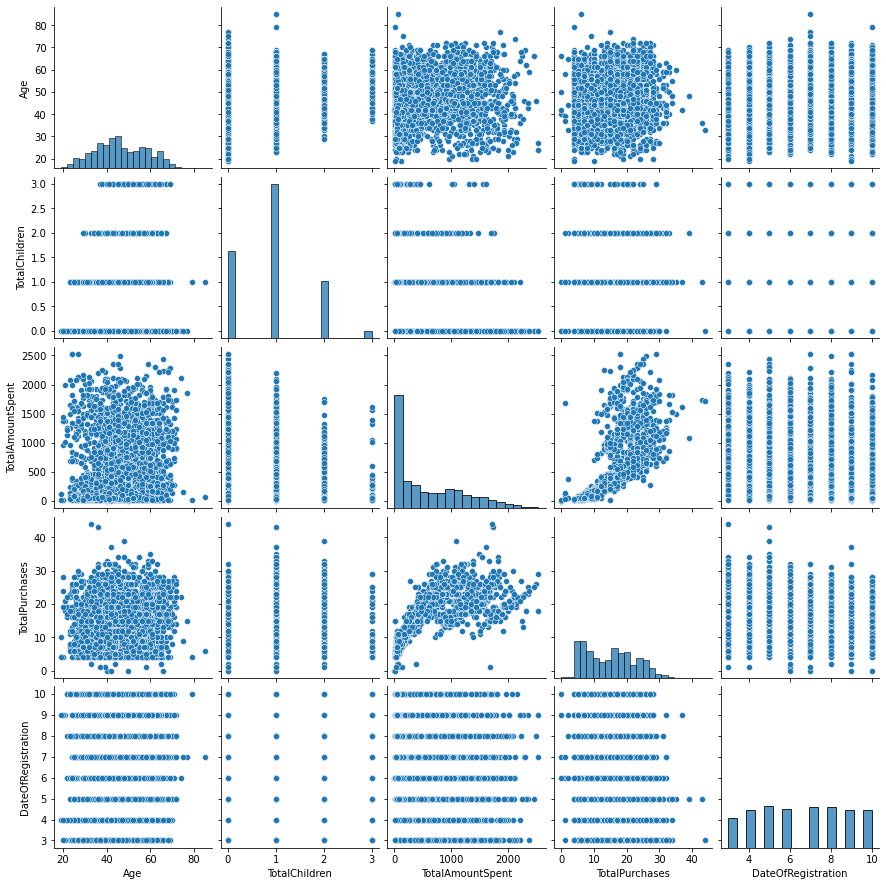

In [12]:
# Select only numeric columns for correlation matrix with ommitting the particular data about products and way of purchase (Amt... and Num...)
selected_features = ['Age', 'TotalChildren', 'TotalAmountSpent', 'TotalPurchases', 'DateOfRegistration']

# Correlation Analysis
correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

df_vif = add_constant(df[selected_features])
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
print(vif_data)
#Total Amount Spent and Total Purchases are responsible for significant part of variance explanation, because they accumulate more detailed data

# Pair plot of selected features
sns.pairplot(df[selected_features])
plt.show()

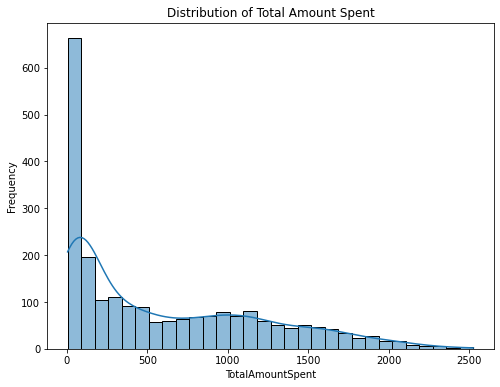

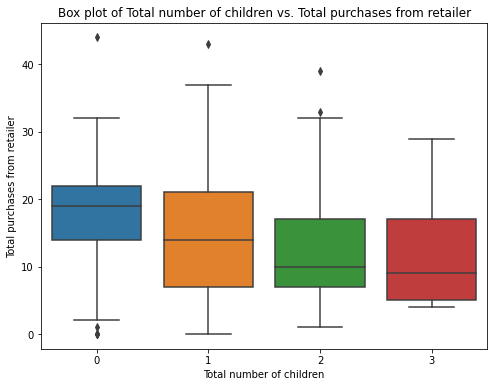

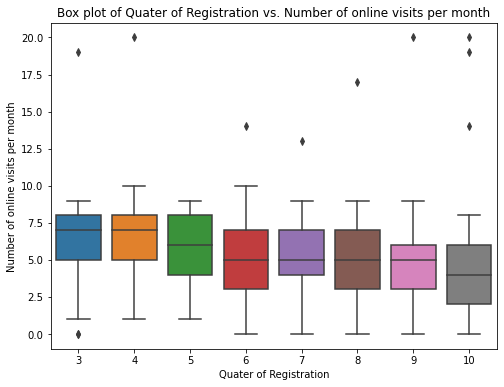

In [13]:
# Visualisation after Feature Engineering
# Histogram of TotalAmountSpent
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalAmountSpent'], bins=30, kde=True)
plt.title('Distribution of Total Amount Spent')
plt.xlabel('TotalAmountSpent')
plt.ylabel('Frequency')
plt.show()

# Box plot: Education Level vs. Average Annual Household Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='TotalChildren', y='TotalPurchases', data=df)
plt.title('Box plot of Total number of children vs. Total purchases from retailer')
plt.xlabel('Total number of children')
plt.ylabel('Total purchases from retailer')
plt.show()

# Box plot: Quater of Registration vs. Number of online visits per month 
plt.figure(figsize=(8, 6))
sns.boxplot(x='DateOfRegistration', y='NumOnlineVisitsMth', data=df)
plt.title('Box plot of Quater of Registration vs. Number of online visits per month')
plt.xlabel('Quater of Registration')
plt.ylabel('Number of online visits per month')
plt.show()

In [14]:
# Justification of Variable Selection for Segmentation Model
selected_features = ['Age', 'EduLvl', 'MaritalS', 'AvgAnnHshldIncome', 'TotalChildren', 'TotalPurchases', 'DateOfRegistration', 'NumOnlineVisitsMth', 'TotalAmountSpent']

print("\nSelected Features for Segmentation Model:")
print(selected_features)


Selected Features for Segmentation Model:
['Age', 'EduLvl', 'MaritalS', 'AvgAnnHshldIncome', 'TotalChildren', 'TotalPurchases', 'DateOfRegistration', 'NumOnlineVisitsMth', 'TotalAmountSpent']


## Justification

<span style="font-size: smaller;">

- Age: Provides information on the demographic profile of customers.
- EduLvl: Level of education.
- MaritalS: Marital status
- AvgAnnHshldIncome: Indicates the financial status of customers. 
- TotalChildren: Total number of children in household
- TotalPurchases: Reflects purchasing behavior with retailer.
- DateOfRegistration: Provides insights into how long the customer has been with the retailer. The bigger the value - the more recent customer.  
- NumOnlineVisitsMth: Number of online store visits per month.  
- TotalAmountSpent: Reflects the spending behavior, assuming all bought products from retailer.
- Cmpgn1Hit to Cmpgn5Hit: Shows the customer's responsiveness to individual marketing campaigns, 0 or 1
</span>

# Building the Segmentation Model

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's prepare the dataset by encoding categorical variables and normalizing the features.

label_encoder = LabelEncoder()
df['EduLvl'] = label_encoder.fit_transform(df['EduLvl'])
df['MaritalS'] = label_encoder.fit_transform(df['MaritalS'])


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[selected_features])

normalized_df = pd.DataFrame(scaled_features, columns=selected_features)

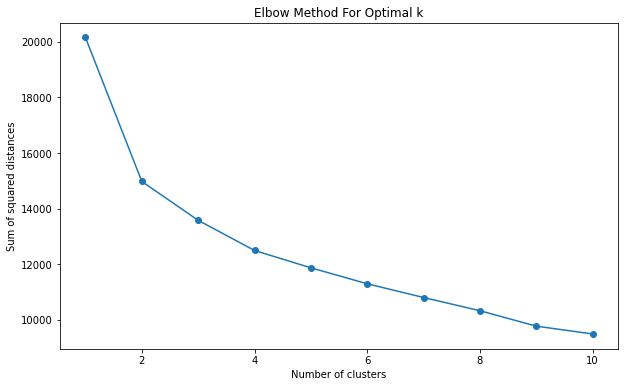

In [16]:
# Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_df)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

The x-axis shows the number of clusters, and the y-axis shows the sum of squared distances (WCSS). WCSS is the total distance between data points and their assigned cluster centers.

The biggest decrease dynamic is seen by two clusters. Adding more clusters beyond this point will result rather in only marginal improvements in WCSS, furthermore may lead to overfitting.

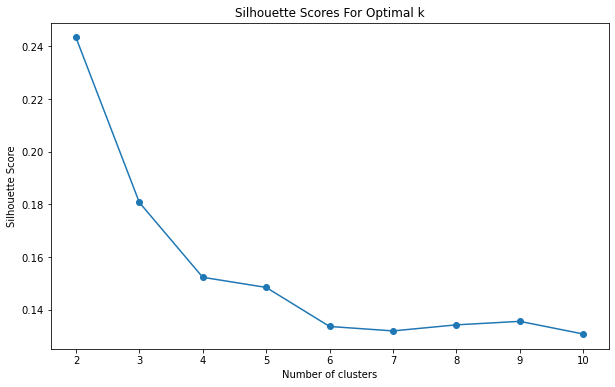

In [17]:
# Silhouette Score
silhouette_scores = []
for k in k_range[1:]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_df)
    score = silhouette_score(normalized_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [18]:
print(silhouette_scores)

[0.2433565326123547, 0.18072487943160234, 0.15231294850582303, 0.14847082815174986, 0.13364603086661458, 0.1319618388444954, 0.13425901151807612, 0.13558960463440953, 0.13079726994340596]


In [19]:
#Paste appropriate Silhouette Score list first.
silhouette_scores = [0.2433565326123547, 0.18072487943160231, 0.15231294850582303, 0.14847082815174986, 0.13364603086661456, 0.1319618388444954, 0.13425901151807612, 0.13558960463440953, 0.13079726994340596]
num_clusters = range(2, len(silhouette_scores) + 2)  # Range of cluster numbers (2 to length of scores + 1)

for cluster, score in zip(num_clusters, silhouette_scores):
  print(f"Number of clusters: {cluster}, Silhouette Score: {score:.6f}")

Number of clusters: 2, Silhouette Score: 0.243357
Number of clusters: 3, Silhouette Score: 0.180725
Number of clusters: 4, Silhouette Score: 0.152313
Number of clusters: 5, Silhouette Score: 0.148471
Number of clusters: 6, Silhouette Score: 0.133646
Number of clusters: 7, Silhouette Score: 0.131962
Number of clusters: 8, Silhouette Score: 0.134259
Number of clusters: 9, Silhouette Score: 0.135590
Number of clusters: 10, Silhouette Score: 0.130797


The highest silhouette score indicates the optimal number of clusters. In this case, two clusters seem to be optimal division for this dataset.

In [20]:
#!pip install gap-stat

In [26]:
from gap_statistic import OptimalK

# Compute the optimal number of clusters using Gap Statistic
optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(normalized_df, cluster_array=np.arange(1, 11))
print(f'Optimal number of clusters using Gap Statistic: {n_clusters}')

Optimal number of clusters using Gap Statistic: 1


In [21]:
from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin scores for a range of cluster numbers
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(normalized_df)
    db_score = davies_bouldin_score(normalized_df, labels)
    db_scores.append(db_score)

# Find the number of clusters with the lowest Davies-Bouldin score
optimal_k_db = np.argmin(db_scores) + 2  # Adding 2 because range starts from 2
print(f'Optimal number of clusters using Davies-Bouldin Index: {optimal_k_db}')

Optimal number of clusters using Davies-Bouldin Index: 2


In [22]:
# K-means with 2 clusters
optimal_k = 2
#K-means++ is used to ensure better initial cluster centers.
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(normalized_df)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

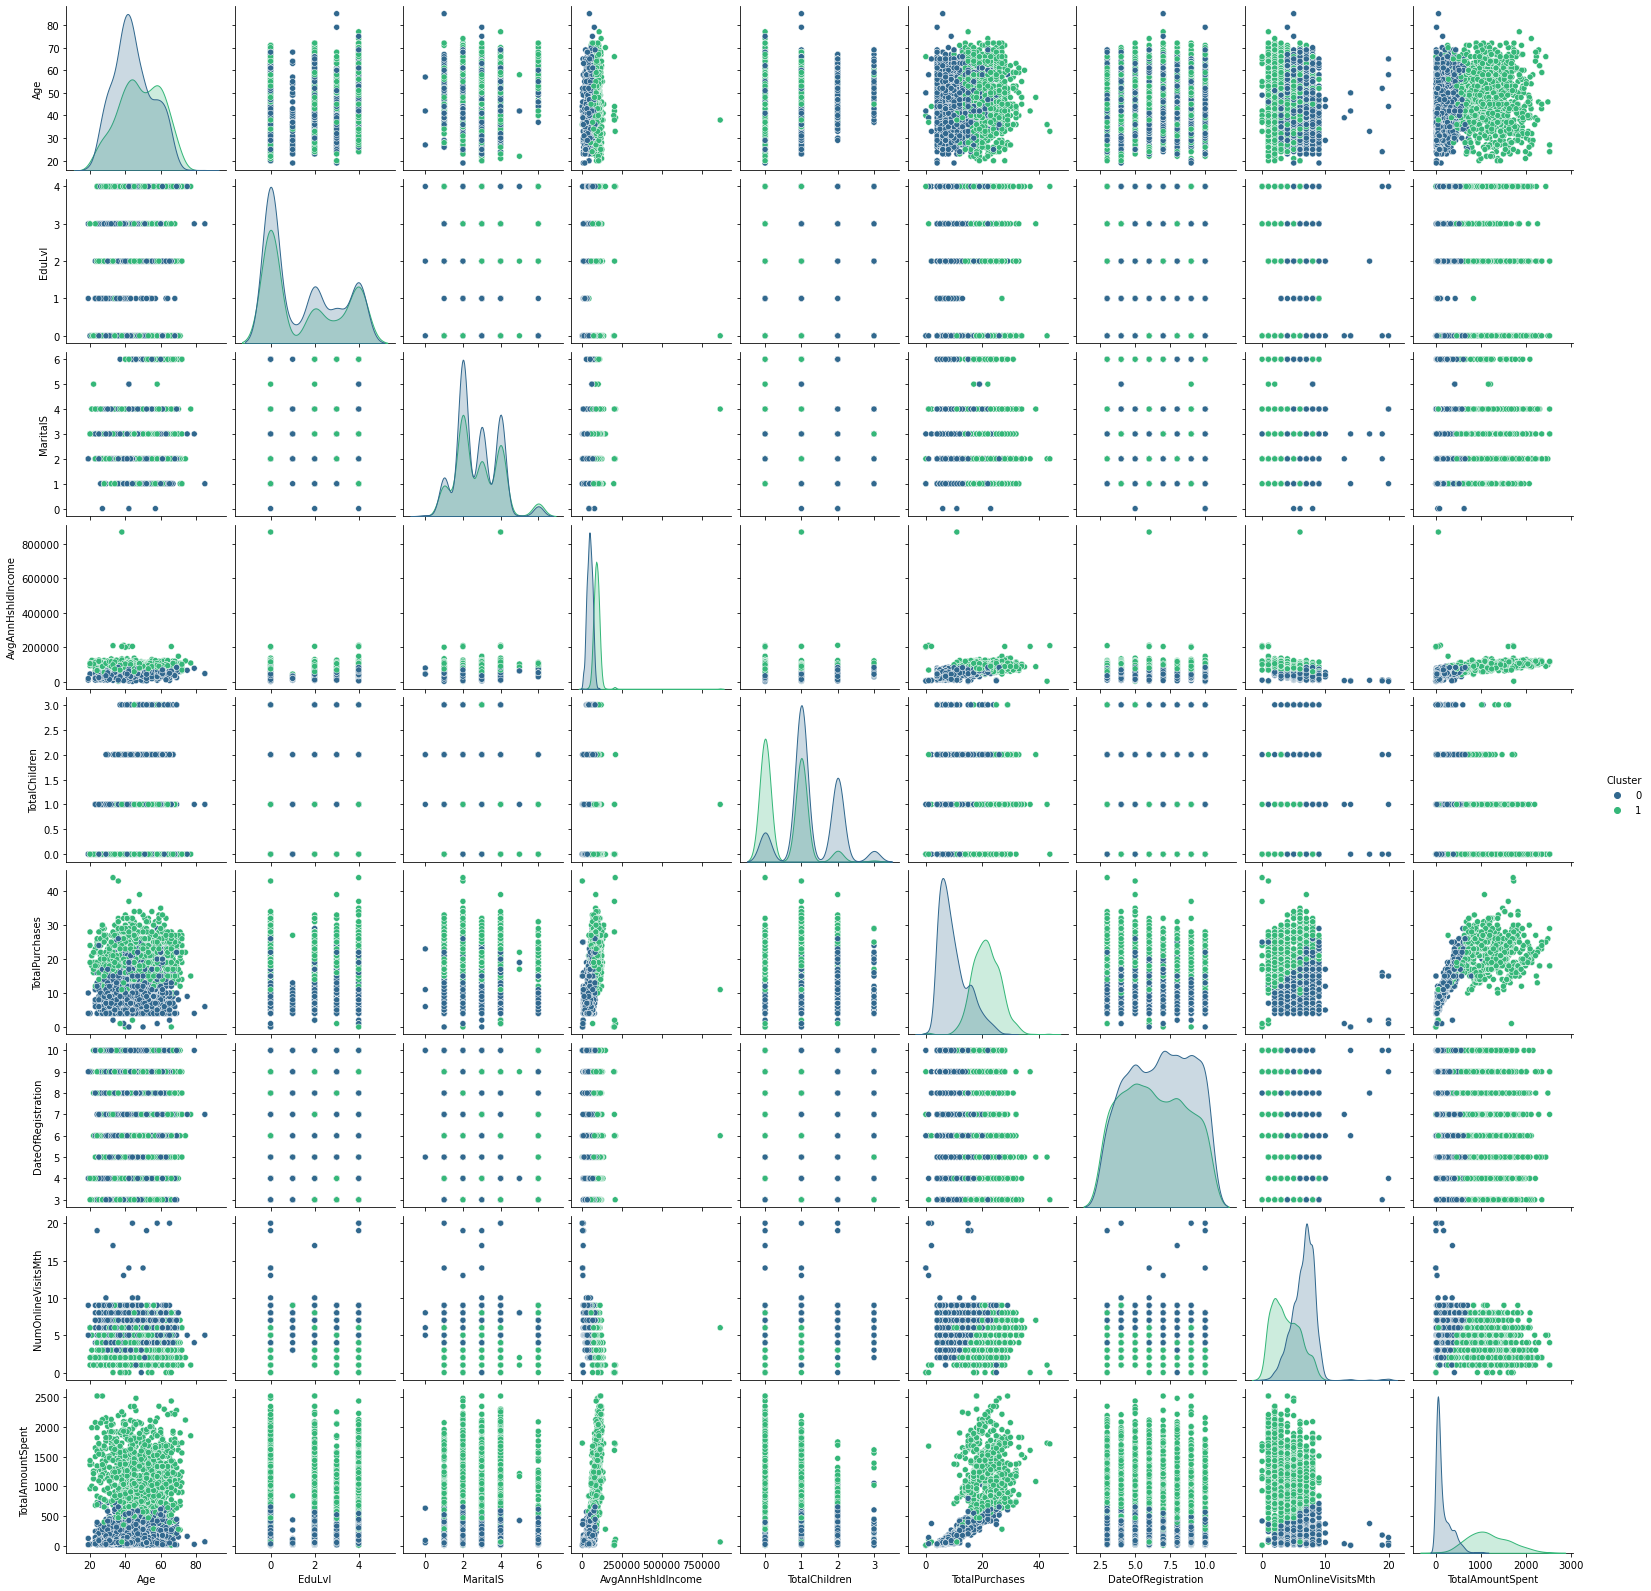


Cluster Statistics:
                Age    EduLvl  MaritalS  AvgAnnHshldIncome  TotalChildren  \
Cluster                                                                    
0        44.449045  1.449045  2.737261       48411.174067       1.271497   
1        48.307927  1.551829  2.808943       92824.757433       0.540650   

         TotalPurchases  DateOfRegistration  NumOnlineVisitsMth  \
Cluster                                                           
0              9.741242            6.773885            6.529459   
1             21.398374            6.363821            3.768293   

         TotalAmountSpent  
Cluster                    
0              160.215764  
1             1174.549797  


In [23]:
# Plotting pairplot with clusters
sns.pairplot(df[selected_features + ['Cluster']], hue='Cluster', palette='viridis')
plt.show()

# Descriptive statistics for each cluster
cluster_stats = df.groupby('Cluster')[selected_features].mean()
print("\nCluster Statistics:\n", cluster_stats)

# Business analysis

In [24]:
# Cluster centers to interpret the centroid values of each feature.
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_features)

print("\nCluster Centers:\n", cluster_centers_df)


Cluster Centers:
          Age    EduLvl  MaritalS  AvgAnnHshldIncome  TotalChildren  \
0  44.449045  1.449045  2.737261       48411.174067       1.271497   
1  48.307927  1.551829  2.808943       92824.757433       0.540650   

   TotalPurchases  DateOfRegistration  NumOnlineVisitsMth  TotalAmountSpent  
0        9.741242            6.773885            6.529459        160.215764  
1       21.398374            6.363821            3.768293       1174.549797  


Cluster Centers

Cluster 0 - customers who spend fewer amounts and use online shopping relatively more often.

Age: ~44.4 years
Education Level: ~1.45 (representing a low to medium education level)

Marital Status: ~2.74 (indicating a mix but leaning towards married)

Average Annual Household Income: ~$48,411

Total Children: ~1.27

Total Purchases: ~9.74

Date of Registration: ~6.77 months ago

Number of Online Visits per Month: ~6.53

Total Amount Spent: ~$160

Cluster 1 - customers with higher income and 0-1 children who are able to spend more. They do not like online shopping.

Age: ~48.3 years

Education Level: ~1.55 (slightly higher than Cluster 0)

Marital Status: ~2.81 (similar to Cluster 0 but slightly more skewed towards married)

Average Annual Household Income: ~$92,825

Total Children: ~0.54

Total Purchases: ~21.4

Date of Registration: ~6.36 months ago

Number of Online Visits per Month: ~3.77

Total Amount Spent: ~$1,175

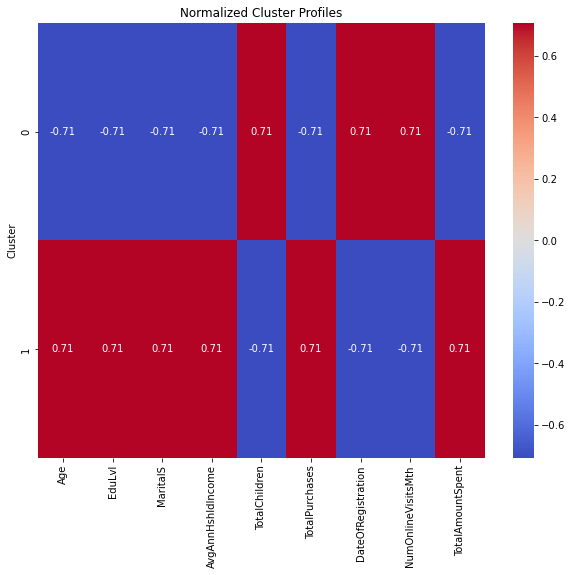

In [25]:
#Heatmaps of Cluster Profiles show 
# the normalized average values of features within each cluster
# and highlight which features are more prominent in each cluster.
import seaborn as sns

# Normalize the data
cluster_means = df.groupby('Cluster')[selected_features].mean()
cluster_means_normalized = (cluster_means - cluster_means.mean()) / cluster_means.std()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_means_normalized, annot=True, cmap='coolwarm', center=0)
plt.title('Normalized Cluster Profiles')
plt.show() 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       368
           1       0.98      0.97      0.98       304

    accuracy                           0.98       672
   macro avg       0.98      0.98      0.98       672
weighted avg       0.98      0.98      0.98       672



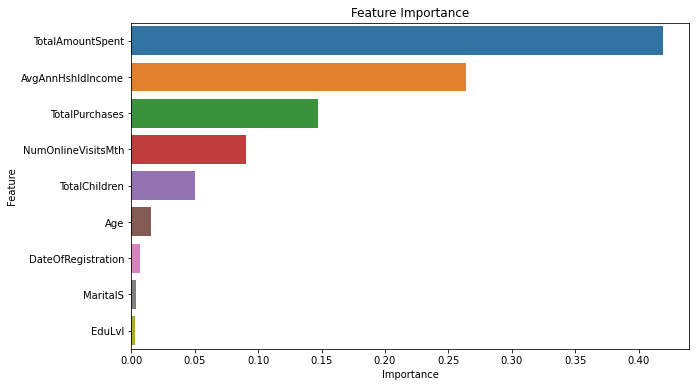

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare data for supervised learning
X = df[selected_features]
y = df['Cluster']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

The cluster with the smallest distance to the new client's feature vector is selected. This ensures that the client is assigned to the group they most closely resemble in terms of the defined features.

In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Let's assume that X_train was the original training data
scaler = StandardScaler()
scaler.fit(X_train)

# New client's features
new_client = np.array([[46, 2, 3, 60000, 1, 15, 7, 5, 500]])

# Standardize the new client's features
new_client_scaled = scaler.transform(new_client)

# Cluster centers (from your trained model)
cluster_centers = np.array([
    [44.4, 1.45, 2.74, 48411, 1.27, 9.74, 6.77, 6.53, 160],
    [48.3, 1.55, 2.81, 92825, 0.54, 21.4, 6.36, 3.77, 1175]
])

# Calculate Euclidean distances to cluster centers
distances = np.linalg.norm(cluster_centers - new_client_scaled, axis=1)

# Assign to the nearest cluster
cluster_assignment = np.argmin(distances)
print(f'The new client is assigned to cluster {cluster_assignment}')

The new client is assigned to cluster 0


## More detailed segmentation

In order to make segments more detailed we can use the power of variables which were initially joined to one. The segmentation presented above may not satisfy marketing needs and can be considered to be too general. 

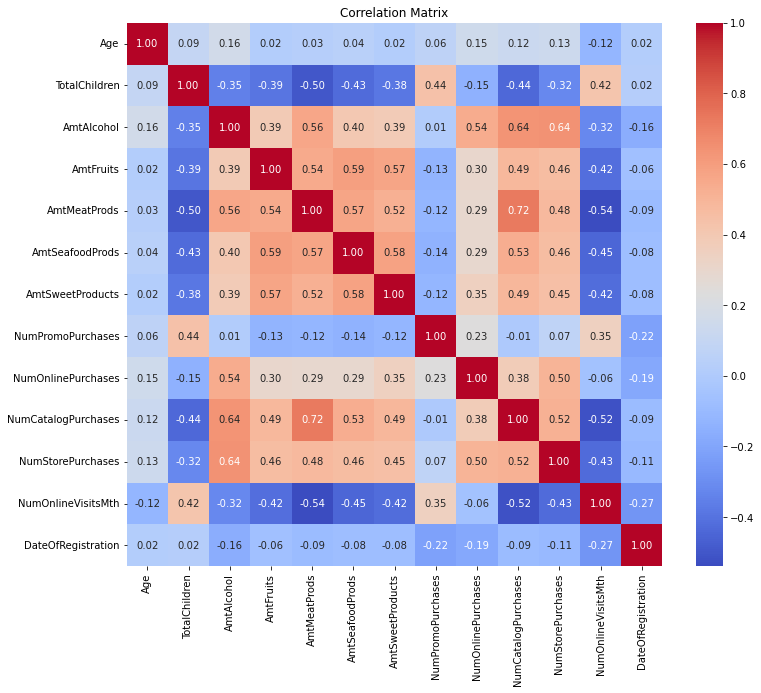

                feature        VIF
0                 const  64.255371
1                   Age   1.098556
2         TotalChildren   1.852531
3            AmtAlcohol   2.534345
4             AmtFruits   1.913415
5          AmtMeatProds   2.765604
6       AmtSeafoodProds   2.036835
7      AmtSweetProducts   1.895142
8     NumPromoPurchases   1.651798
9    NumOnlinePurchases   1.758239
10  NumCatalogPurchases   2.883139
11    NumStorePurchases   2.267134
12   NumOnlineVisitsMth   2.333317
13   DateOfRegistration   1.261939


c:\Users\48795\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
selected_features = ['Age', 'TotalChildren', 'AmtAlcohol', 'AmtFruits', 'AmtMeatProds', 'AmtSeafoodProds', 'AmtSweetProducts', 'NumPromoPurchases', 'NumOnlinePurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumOnlineVisitsMth', 'DateOfRegistration']

# Correlation Analysis
correlation_matrix = df[selected_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

df_vif = add_constant(df[selected_features])
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
print(vif_data)

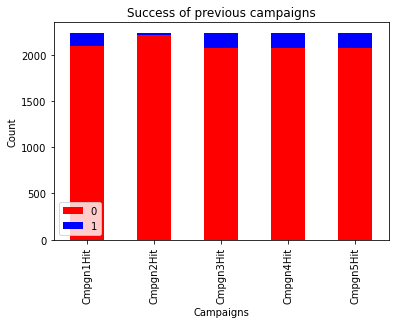

In [29]:
#Box plot: Success of companies
campaigns = ['Cmpgn1Hit', 'Cmpgn2Hit', 'Cmpgn3Hit', 'Cmpgn4Hit', 'Cmpgn5Hit']
proportions = df[campaigns].apply(pd.Series.value_counts).T
proportions.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title('Success of previous campaigns')
plt.xlabel('Campaigns')
plt.ylabel('Count')
plt.legend(['0', '1'])
plt.show()

In [30]:
selected_features = ['Age', 'EduLvl', 'MaritalS', 'AvgAnnHshldIncome', 'TotalChildren', 'DateOfRegistration', 'AmtAlcohol', 'AmtFruits', 'AmtMeatProds', 'AmtSeafoodProds', 'AmtSweetProducts', 'NumPromoPurchases', 'NumOnlinePurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumOnlineVisitsMth', 'Cmpgn1Hit', 'Cmpgn2Hit', 'Cmpgn3Hit', 'Cmpgn4Hit', 'Cmpgn5Hit']
print("\nSelected Features for Segmentation Model:")
print(selected_features)


Selected Features for Segmentation Model:
['Age', 'EduLvl', 'MaritalS', 'AvgAnnHshldIncome', 'TotalChildren', 'DateOfRegistration', 'AmtAlcohol', 'AmtFruits', 'AmtMeatProds', 'AmtSeafoodProds', 'AmtSweetProducts', 'NumPromoPurchases', 'NumOnlinePurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumOnlineVisitsMth', 'Cmpgn1Hit', 'Cmpgn2Hit', 'Cmpgn3Hit', 'Cmpgn4Hit', 'Cmpgn5Hit']


In [31]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
scaled_features_2 = scaler.fit_transform(df[selected_features])

normalized_df_2 = pd.DataFrame(scaled_features_2, columns=selected_features)

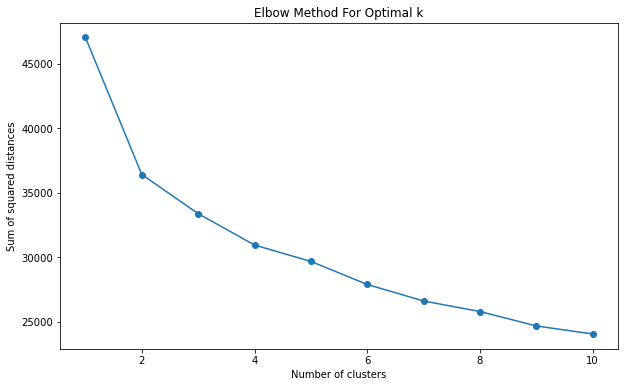

In [32]:
# Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_df_2)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

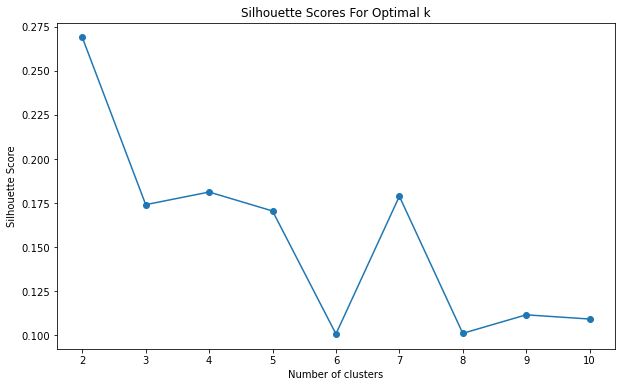

In [33]:
# Silhouette Score
silhouette_scores = []
for k in k_range[1:]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_df_2)
    score = silhouette_score(normalized_df_2, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

According to the graphs we can try to apply 4 segments to obtain more specific groups of customers. 

In [34]:
# K-means with 4 clusters
optimal_k = 4
#K-means++ is used to ensure better initial cluster centers.
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(normalized_df_2)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

In [35]:
# Cluster centers to interpret the centroid values of each feature.
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_features)

print("\nCluster Centers:\n", cluster_centers_df)


Cluster Centers:
          Age    EduLvl  MaritalS  AvgAnnHshldIncome  TotalChildren  \
0  43.495192  1.438462  2.730769       45928.361584       1.227885   
1  50.084772  1.687598  2.740973       74844.911754       1.145997   
2  46.562852  1.362101  2.866792      101184.151233       0.200750   
3  46.866667  1.666667  2.933333       92371.283333       0.500000   

   DateOfRegistration  AmtAlcohol  AmtFruits  AmtMeatProds  AmtSeafoodProds  \
0            6.990385   41.931731   4.911538     22.777885         6.872115   
1            5.962323  452.737834  24.368917    141.174254        33.781790   
2            6.577861  603.851782  70.538462    474.375235       101.742964   
3            6.533333  898.666667  22.966667    250.300000        38.733333   

   ...  NumPromoPurchases  NumOnlinePurchases  NumCatalogPurchases  \
0  ...           1.995192            2.096154             0.570192   
1  ...           3.777080            6.459969             3.111460   
2  ...           1.26829

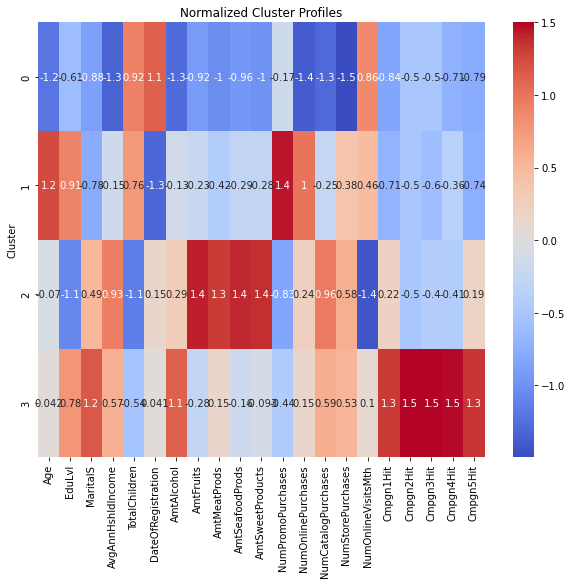

In [36]:
#Heatmaps of Cluster Profiles show 
# the normalized average values of features within each cluster
# and highlight which features are more prominent in each cluster.
import seaborn as sns

# Normalize the data
cluster_means = df.groupby('Cluster')[selected_features].mean()
cluster_means_normalized = (cluster_means - cluster_means.mean()) / cluster_means.std()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_means_normalized, annot=True, cmap='coolwarm', center=0)
plt.title('Normalized Cluster Profiles')
plt.show()

This heatmap will help to interpret groups from detailed business point of view. 

Cluster 0 - customers with the children who have the longest relation with the shop (the oldest DateOfRegistration). However they are the yongest by the age and with the lowest household income. They are willing to visit the shop online but are not tend to buy anything online (it is recommended to adjust marketing strategy to convince to buy online). 

Cluster 1 - customers who have the shortest relation with the shop and the highest age among all the groups. They tend to use promotions and online shopping (it is recommended to target promotions online). 

Cluster 2 - customers with no children, lowest level of education and the highest average income are willing to spend more on the products like fruits, meat, seafood and sweets. They do not go online and prefer product catalogs (it is recommended to target promotions offline). 

Cluster 3 - married customers who are especially responsive to all the marketing campaigns prefer to spend more on alcohol (it is recommended to aim marketing campaigns at them). 

### INNOVATIONS

Scenario Analysis
1.  We evaluate how different marketing scenarios impact cluster composition and simulate the impact of different promotional strategies on customer clusters.
2.  Time-based clustering and scenario analysis can help understand customer behavior under different conditions. 

In [37]:
def simulate_promotions(df, cluster_col, discount_rate):
    df_copy = df.copy()
    df_copy['DiscountedAmountSpent'] = df_copy['TotalAmountSpent'] * (1 - discount_rate)
    # Re-cluster based on simulated data
    kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
    df_copy['NewCluster'] = kmeans.fit_predict(df_copy[selected_features + ['DiscountedAmountSpent']])
    return df_copy

simulated_df = simulate_promotions(df, 'Cluster', discount_rate=0.1)

print(simulated_df)

        ID  BirthYr  EduLvl  MaritalS  AvgAnnHshldIncome  NumChildren  \
0        1     1966       0         3            75579.4            0   
1        2     1963       0         3            60247.2            1   
2        3     1974       0         4            93096.9            0   
3        4     1993       0         4            34639.8            1   
4        5     1990       4         2            75780.9            1   
...    ...      ...     ...       ...                ...          ...   
2235  2236     1976       0         2            79589.9            0   
2236  2237     1955       4         4            83218.2            2   
2237  2238     1990       0         1            74075.3            0   
2238  2239     1965       2         4            90018.5            0   
2239  2240     1963       4         2            68729.7            1   

      NumTeenagers RegistrationDt  NumDays  AmtAlcohol  ...  Cmpgn4Hit  \
0                0     2022-09-04       58       

Supervised Models
As an alternative to our default analysis, we decided to use clusters as labels for supervised learning and try to create predictive models to classify new customers into segments.

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       284
           1       0.91      0.93      0.92       220
           2       0.94      0.94      0.94       158
           3       1.00      0.80      0.89        10

    accuracy                           0.94       672
   macro avg       0.96      0.91      0.93       672
weighted avg       0.95      0.94      0.95       672



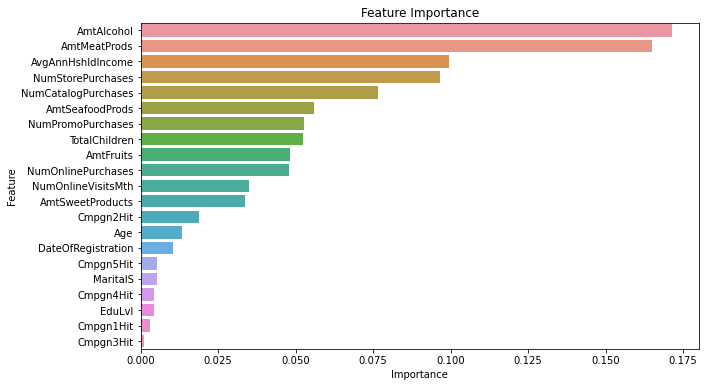

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare data for supervised learning
X = df[selected_features]
y = df['Cluster']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importance
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

## Alternative clustering methods

As an alternative clustering method we've decided to go with Gaussian Mixture Model. To compare Kmeans with 2 clusters and GMM with 2 components we will use Silhouette Score.

In [39]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Gaussian Mixture Model for 2 clusters
gmm_2 = GaussianMixture(n_components=2, random_state=42)
gmm_labels_2 = gmm_2.fit_predict(normalized_df)
gmm_2.fit(normalized_df)

# KMeans for 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_labels_2 = kmeans_2.fit_predict(normalized_df)
kmeans_2.fit(normalized_df)

# New client's data
new_client = np.array([[46, 2, 3, 60000, 1, 15, 7, 5, 500]])

# Standardize the new client's data using the same scaler
new_client_scaled = new_client

# Predict the cluster for the new client
new_client_gmm_cluster_2 = gmm_2.predict(new_client_scaled)
new_client_kmeans_cluster_2 = kmeans_2.predict(new_client_scaled)

print(f'The new client belongs to cluster (for GMM with 2 components): {new_client_gmm_cluster_2[0]}')
print(f'The new client belongs to cluster (for KMeans with 2 clusters): {new_client_kmeans_cluster_2[0]}')

The new client belongs to cluster (for GMM with 2 components): 1
The new client belongs to cluster (for KMeans with 2 clusters): 1


In [40]:
from sklearn.metrics import silhouette_score

kmeans_silhouette_2 = silhouette_score(normalized_df, kmeans_labels_2)
gmm_silhouette_2 = silhouette_score(normalized_df, gmm_labels_2)

print(f"Silhouette Score for KMeans with 2 clusters: {kmeans_silhouette_2},\nSilhouette Score for GMM with 2 components: {gmm_silhouette_2}\nSilhouette Score for KMeans is higher, which means that KMeans is better than GMM in this case")

Silhouette Score for KMeans with 2 clusters: 0.2433565326123547,
Silhouette Score for GMM with 2 components: 0.22322674595591044
Silhouette Score for KMeans is higher, which means that KMeans is better than GMM in this case


In [41]:
# Cluster centers to interpret the centroid values of each feature.
selected_features = ['Age', 'EduLvl', 'MaritalS', 'AvgAnnHshldIncome', 'TotalChildren', 'TotalPurchases', 'DateOfRegistration', 'NumOnlineVisitsMth', 'TotalAmountSpent']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[selected_features])
cluster_centers = scaler.inverse_transform(gmm_2.means_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_features)

print("\nCluster Centers:\n", cluster_centers_df)


Cluster Centers:
          Age    EduLvl  MaritalS  AvgAnnHshldIncome  TotalChildren  \
0  44.299849  1.450525  2.734075       47005.584162       1.263735   
1  47.982127  1.537716  2.803304       88764.497685       0.638248   

   TotalPurchases  DateOfRegistration  NumOnlineVisitsMth  TotalAmountSpent  
0        8.644267            6.877189            6.385175        116.972656  
1       21.058207            6.311297            4.251579       1092.923020  
